# Mercado Inmobiliario de la Ciudad de Buenos Aires

Los datos utilizados a continuación han sido provistos por [Properati](http://www.properati.com.ar). El dataset incluye información de toda la Argentina, nosotros trabajaremos específicamente con la Ciudad de Buenos Aires. El presente notebook se enfoca fundamentalmente en el procesamiento de los datos para su presentación y modelado.

# Data processing

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
path_dataset = 'Data/ar_properties.csv'
pd.set_option('display.float_format', lambda x: '%.4f' % x)
os.chdir('..')
df = pd.read_csv(path_dataset,parse_dates=['created_on'],infer_datetime_format=True)
os.chdir('Notebooks')
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,qsSpE6iU0gWfAvpjC5gvYw==,Propiedad,2019-08-04,9999-12-31,2019-08-04,-32.9405,-60.8891,Argentina,Santa Fe,Rosario,...,nan,nan,nan,nan,NaN,Mensual,Terreno de 1170m² frente a Puerto Roldan,Eden propiedades comercializa lote de terreno ...,Lote,Venta
1,+Rxjg/ggRqx/oElgrpo4sQ==,Propiedad,2019-08-04,9999-12-31,2019-08-04,-34.9690,-58.0316,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,...,nan,nan,nan,nan,NaN,Mensual,Terreno 19 x 36 Mts 2 - Melchor Romero,Terreno a pocas cuadras de la avenida 44 con s...,Lote,Venta
2,V3Yv1BK7JRpAKww25qcneg==,Propiedad,2019-08-04,9999-12-31,2019-08-04,-37.1146,-56.8607,Argentina,Buenos Aires Costa Atlántica,Pinamar,...,nan,125.0000,95.0000,24000.0000,ARS,Mensual,Casa alquiler temporal,A 5 minutos de Pinamar . Colectivos a Pinamar ...,Casa,Alquiler temporal
3,ExDZh3FJC+2mk0vPhUQwEQ==,Propiedad,2019-08-04,2019-11-05,2019-08-04,-34.5849,-58.4233,Argentina,Capital Federal,Palermo,...,nan,nan,nan,6000.0000,ARS,Mensual,Cochera - Palermo,ALQUILER Cochera Doble (un auto delante de otr...,Cochera,Alquiler
4,hEQ6zt+ufeugBkPexDR7Ag==,Propiedad,2019-08-04,9999-12-31,2019-08-04,-31.3613,-64.2380,Argentina,Córdoba,Córdoba,...,nan,nan,100.0000,35000.0000,ARS,Mensual,Local - en alquiler excelente sobre Rafael Nuñez,Ches alquila excelente local de 100 m2 para ac...,Local comercial,Alquiler


In [3]:
# Vemos las columnas que tiene el dataset
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [4]:
# Eliminamos columnas que no nos interesan
df.drop(columns=['id','start_date','end_date','l1','l4','l5','l6','bedrooms','bathrooms','price_period'],inplace=True)

In [5]:
# Vemos algunas columnas en detalle para filtrar
print('ad_type: ',df.ad_type.unique())
print('l2: ',df.l2.unique())
print('currency: ',df.currency.unique())
print('property_type: ',df.property_type.unique())
print('operation_type: ',df.operation_type.unique())

ad_type:  ['Propiedad']
l2:  ['Santa Fe' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Capital Federal' 'Córdoba' 'Bs.As. G.B.A. Zona Oeste'
 'Bs.As. G.B.A. Zona Norte' 'Buenos Aires Interior' 'Florida' 'Chubut'
 'Río Negro' 'San Luis' 'Tucumán' 'Mendoza' 'Neuquén' 'Entre Ríos'
 'La Pampa' 'Maldonado' 'Misiones' 'Salta' 'Montevideo' 'Corrientes'
 'Tierra Del Fuego' 'Canelones' 'San Juan' 'Santa Cruz' 'Chaco' 'Colonia'
 'La Rioja' 'Rocha' 'Santiago Del Estero' 'Catamarca' 'Santa Catarina'
 'Michigan' 'Miami' 'Jujuy' 'Maryland' 'Rio de Janeiro' 'Pennsylvania'
 'Formosa' 'New York' 'São Paulo']
currency:  [nan 'ARS' 'USD' 'UYU' 'PEN']
property_type:  ['Lote' 'Casa' 'Cochera' 'Local comercial' 'PH' 'Otro' 'Departamento'
 'Oficina' 'Depósito' 'Casa de campo']
operation_type:  ['Venta' 'Alquiler temporal' 'Alquiler']


In [6]:
# ad_type la podemos eliminar
df.drop(columns='ad_type',inplace=True)
# Filtramos: l2 para CABA, currency USD
# property_type residenciales, operation_type Venta
df = df[(df.l2 == 'Capital Federal') & (df.currency == 'USD')]
df = df[(df.operation_type == 'Venta') & (df.property_type.isin(['PH','Casa','Departamento']))]
# Una vez filtrado, elimino las columnas que tienen valor constante
df.drop(columns=['l2','currency','operation_type'],inplace=True)
# Cambiamos el nombre a una columna
df.rename({'l3':'barrio_publicado'},axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69893 entries, 20 to 419649
Data columns (total 11 columns):
created_on          69893 non-null datetime64[ns]
lat                 66540 non-null float64
lon                 66540 non-null float64
barrio_publicado    69518 non-null object
rooms               64659 non-null float64
surface_total       66188 non-null float64
surface_covered     67404 non-null float64
price               69893 non-null float64
title               69883 non-null object
description         69893 non-null object
property_type       69893 non-null object
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 6.4+ MB


## Limpiando el dataframe de errores

### NaNs

In [7]:
# Chequeo los NaNs
df.isna().sum()[df.isna().sum()>0]

lat                 3353
lon                 3353
barrio_publicado     375
rooms               5234
surface_total       3705
surface_covered     2489
title                 10
dtype: int64

In [8]:
# Los datos sin localización o superficie los voy a descartar
df.dropna(subset=['lat','lon','surface_total','surface_covered'],axis=0,inplace=True)

### Errores de data entry: superficie

In [9]:
# Errores de data entry: chequeo instacias de surface_total < surface_covered
# Si son pocas las elimino
input_error1 = df[df.surface_total < df.surface_covered].shape[0]
print(f'Hay {input_error1} instancias con error')

Hay 524 instancias con error


In [10]:
df.drop(df[df.surface_total < df.surface_covered].index,inplace=True)
input_error1 = df[df.surface_total < df.surface_covered].shape[0]
print(f'Hay {input_error1} instancias con error')

Hay 0 instancias con error


In [11]:
df[df.surface_covered > df.surface_total].shape[0]

0

### Errores de data entry: coordenadas repetidas

A menudo cuando la carga de coordenadas (latitud y longitud) representa un problema de data entry (por ejemplo, porque no está la información) se utilizan coordenadas "aproximadas" (algún lugar o esquina icónicas de la Ciudad, como el Obelisco o Cabildo y Juramento). A continuación trabajaremos para eliminar este tipo de error.

In [12]:
# Error data entry: estudio cuantas instancias repiten latitud y logitud
# lat_rep y lon_rep son una lista de instancias con lat y lon repetidos
lat_rep = df.lat.value_counts()
lat_rep = list(lat_rep[lat_rep > 1].index)
lon_rep = df.lon.value_counts()
lon_rep = list(lon_rep[lon_rep > 1].index)
# Chequeo cuantas instancias cumplen ambas condiciones
df[(df.lat.isin(lat_rep)) & (df.lon.isin(lon_rep))].shape[0]

43887

El valor es muy elevado, no me gustaría perder tantas instancias. Voy a hacer lo mismo para varios numeros de repeticiones y buscar un balance entre perder información y tener información errónea.

In [13]:
count_list = []
for i in range(1,11):
    lat_rep = df.lat.value_counts()
    lat_rep = list(lat_rep[lat_rep > i].index)
    lon_rep = df.lon.value_counts()
    lon_rep = list(lon_rep[lon_rep > i].index)
    count = df[(df.lat.isin(lat_rep)& (df.lon.isin(lon_rep)))].shape[0]
    count_list.append(count)

diferencias = [(count_list[i-1] - count_list[i]) if i > 0 else count_list[i] for i in range(len(count_list))]
error_dict = {'Repeticiones':range(1,11),'Instancias':count_list,'Diferencias':diferencias,\
             'Dif.%':(np.array(diferencias) / df.shape[0])}
df_repeat = pd.DataFrame(error_dict)
df_repeat

,Repeticiones,Instancias,Diferencias,Dif.%
0,1,43887,43887,0.7157
1,2,33577,10310,0.1681
2,3,28544,5033,0.0821
3,4,25060,3484,0.0568
4,5,22923,2137,0.0348
5,6,21040,1883,0.0307
6,7,19651,1389,0.0227
7,8,18571,1080,0.0176
8,9,17734,837,0.0136
9,10,16714,1020,0.0166


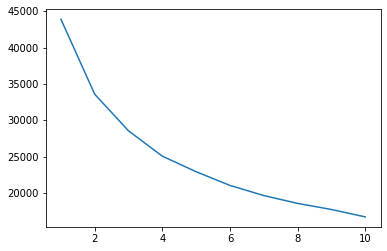

In [14]:
# Ploteamos el trade-off
plt.plot(range(1,11),count_list)

Vamos a aprovechar la curvatura de este trade-off y establecer un corte en 4: aquellas instancias cuyas coordenadas se repiten más de tres veces, las descartamos.

In [15]:
lat_rep = df.lat.value_counts()
lat_rep = list(lat_rep[lat_rep > 4].index)
lon_rep = df.lon.value_counts()
lon_rep = list(lon_rep[lon_rep > 4].index)
# Chequeo cuantas instancias cumplen ambas condiciones
df.drop(df[(df.lat.isin(lat_rep))& (df.lon.isin(lon_rep))].index,inplace=True)
df.shape[0]

36260

## Feature engineering

### Barrios

A continuación vamos a asignar cada propiedad a su barrio, a través la información geométrica de las coordenadas extraída de [BA Data](https://data.buenosaires.gob.ar/).

In [16]:
# Importo geopandas, importo mapa de los barrios
from shapely.geometry import Point, Polygon
import geopandas as gpd
os.chdir('..')
map_df = gpd.read_file('Data/barrios.csv')
os.chdir('Notebooks')
map_df[['barrio','geometry']].head(7)

,barrio,geometry
0,CHACARITA,"POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,PATERNAL,"POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,VILLA CRESPO,"POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,VILLA DEL PARQUE,"POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,ALMAGRO,"POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."
5,CABALLITO,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
6,VILLA SANTA RITA,"POLYGON ((-58.48192 -34.62429, -58.48274 -34.6..."


In [17]:
# Asignamos a cada propiedad su barrio
df.reset_index(inplace=True,drop=True)
df['barrio'] = 'barrio'
for i in range(df.shape[0]):
    point = Point(df.lon[i],df.lat[i])
    for j in range(map_df.shape[0]):
        if point.within(map_df.at[j,'geometry']):
            df.at[i,'barrio'] = map_df.at[j,'barrio']
            break

Algunas muestras quedaron sin barrio asignado.

In [18]:
print(f'Muestras sin barrio: ',df[df.barrio == 'barrio'].shape[0])
df[df.barrio == 'barrio'].head()

Muestras sin barrio:  14


,created_on,lat,lon,barrio_publicado,rooms,surface_total,surface_covered,price,title,description,property_type,barrio
133,2019-09-07,-29.4252,-66.8487,NaN,2.0000,79.0000,44.0000,90000.0000,Departamento venta,44 metros cubiertos con 35 metros de terraza p...,Departamento,barrio
256,2019-09-16,-34.6019,-58.3653,Puerto Madero,3.0000,118.0000,105.0000,549000.0000,3 AMB CON COCHERA TERRAZAS DEL YACHT,DEPARTAMENTO 3 AMBIENTES EN VENTA CON COCHERA ...,Departamento,barrio
1923,2019-08-26,-24.1858,-65.2995,NaN,6.0000,155.0000,140.0000,290000.0000,Piso exclusivo de 3 dormitorios con cochera en...,DEPARTAMENTO DE 3 DORMITORIOS MÁS COMODÍN EN J...,Departamento,barrio
3546,2019-07-29,-32.8126,-61.3815,NaN,6.0000,942.0000,257.0000,560000.0000,CASA 6 AMB 3 PLANTAS PARQUE PISCINA QUINCHO,Corredor Responsable: Ramiro Cappelloni - C.M....,Casa,barrio
5545,2019-09-06,-40.1546,-71.3438,NaN,2.0000,45.0000,45.0000,163000.0000,Depto 2 ambientes San Martin de los Andes Centro,EDIFICIO TERMINADO - ENTREGA INMEDIATA<br>HERM...,Departamento,barrio


Para chequear cuál es el problema, vamos a hacer una lista de las coordenadas de las muestras sin asginación.

In [19]:
# Filtro las muestras sin barrio asignado
df_sin_barrio = df[df.barrio == 'barrio'].reset_index(drop=True)
# Construyo una lista con las coordenadas
lista_sin_barrio = []
for i in range(df_sin_barrio.shape[0]):
    lista_sin_barrio.append((df_sin_barrio.at[i,'lat'],df_sin_barrio.at[i,'lon']))
lista_sin_barrio

[(-29.425203200000002, -66.8487483),
 (-34.601868100000004, -58.3652544),
 (-24.185786399999998, -65.2994767),
 (-32.812554999999996, -61.381538),
 (-40.15461911, -71.3438390735),
 (-40.154635510300004, -71.3439034465),
 (-34.601868100000004, -58.3652544),
 (-31.390929999999997, -64.14415),
 (-32.9704406905, -68.8348672796),
 (-24.782126899999998, -65.42319760000001),
 (-32.9670877647, -68.8472778607),
 (-34.670257, -58.508331999999996),
 (-33.01585, -69.117172),
 (-34.601868100000004, -58.3652544)]

Probando en Google Maps con una, encuentro que se trata de una propiedad fuera de CABA. Pareciera ser otro problema de data entry. En la siguiente celda chequeamos que ese sea el problema en toda la lista. 

In [20]:
# Creo un polígono que sea el límite de CABA, uniendo todos los polígonos de los barrios
from shapely.ops import unary_union
polygons = [map_df.at[i,'geometry'] for i in range(map_df.shape[0])]
boundary = unary_union(polygons)
# Variable de chequeo, si hay alguna propiedad dentro de CABA le cambio su estado
check = False

for point in lista_sin_barrio:
    coord = Point(point[1],point[0])
    if coord.within(boundary):
        check = True

if check == False:
    print(f'Remover las muestras sin barrio, no corresponden a CABA')
else:
    print('Chequear las muestras manualmente')

Remover las muestras sin barrio, no corresponden a CABA


In [21]:
drop_index = df[df.barrio == 'barrio'].index
df.drop(drop_index,inplace=True)
errors_left = df[df.barrio == 'barrio'].shape[0]
print(f'Quedaron {errors_left} muestras con errores.')

Quedaron 0 muestras con errores.


### Radios Censales

A continuación vamos a agregar algunos features que podrían ser relevantes para determinar el valor de una propiedad, y que, cuando están disponibles, suelen utilizarse en modelos predictivos del precio. Se trata de la densidad poblacional y (alguna medida de) el ingreso pér capita. En el caso de la Ciudad de Buenos Aires, dicha información es publicada por comuna, por la [Dirección de Estadística y Censos](https://www.estadisticaciudad.gob.ar/eyc/). Esta forma de agregación es un poco gruesa para nuestros objetivos, con lo cual vamos a utilizar los radios censales publicados por [BA Data](https://data.buenosaires.gob.ar/dataset/informacion-censal-por-radio). Lamentablemente no todos los archivos de esta página son iguales, con lo cual nos tocará combinar distintos tipos de archivos para poder construir el dataset con precisión.

In [22]:
# Importamos .shp con geopandas
os.chdir('..')
dfradios_shp = gpd.read_file('Data/informacion_censal_por_radio_2010.shp')
os.chdir('Notebooks')
print(dfradios_shp.shape)
dfradios_shp.head()

(3554, 9)


,RADIO_I,BARRIO,COMUNA,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry
0,1_1_1,RETIRO,1,336.0000,82.0000,65.0000,19.0000,1.7990,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1,1_12_1,SAN NICOLAS,1,341.0000,365.0000,116.0000,25.0000,0.0186,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
2,1_12_10,SAN NICOLAS,1,296.0000,629.0000,101.0000,1.0000,0.0444,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
3,1_12_11,SAN NICOLAS,1,528.0000,375.0000,136.0000,7.0000,0.3663,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
4,1_12_2,SAN NICOLAS,1,229.0000,445.0000,129.0000,16.0000,0.0184,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."


In [23]:
# Importamos .xlsx con pandas (.csv me tiraba un error)
os.chdir('..')
dfradios_xlsx = pd.read_excel('Data/informacion-censal-por-radio-2010.xlsx')
os.chdir('Notebooks')
print(dfradios_xlsx.shape)
dfradios_xlsx.head()

(3554, 21)


,WKT,WKT_2,ID,CO_FRAC_RA,COMUNA,FRACCION,RADIO,TOTAL_POB,T_VARON,T_MUJER,...,T_VIVIENDA,V_PARTICUL,V_PARTICUL_POR,V_COLECTIV,V_COLECTIV_POR,T_HOGAR,H_CON_NBI,H_CON_NBI_POR,H_SIN_NBI,H_SIN_NBI_POR
0,MULTIPOLYGON (((-58.372489764082054 -34.591546...,NaN,1,1_1_1,COMUNA 1,1,1,336,212,124,...,82,80,"97,56%",2,"2,50%",65,19,"29,23%",46,"70,77%"
1,MULTIPOLYGON (((-58.386522330570898 -34.603993...,NaN,2,1_12_1,COMUNA 1,12,1,341,184,157,...,365,361,"98,90%",4,"1,11%",116,25,"21,55%",91,"78,45%"
2,MULTIPOLYGON (((-58.37938327879349 -34.6048381...,NaN,3,1_12_10,COMUNA 1,12,10,296,162,134,...,629,627,"99,68%",2,"0,32%",101,1,"0,99%",100,"99,01%"
3,MULTIPOLYGON (((-58.367921141467477 -34.605174...,NaN,4,1_12_11,COMUNA 1,12,11,528,294,234,...,375,370,"98,67%",5,"1,35%",136,7,"5,15%",129,"94,85%"
4,MULTIPOLYGON (((-58.385132649433665 -34.603911...,NaN,5,1_12_2,COMUNA 1,12,2,229,101,128,...,445,445,"100,00%",0,"0,00%",129,16,"12,40%",113,"87,60%"


Como se ve, contienen features diferentes, pese a provenir de la misma base y tener la misma cantidad de filas. En primer lugar voy a chequear que estén en el mismo orden (con el ID que ambos datasets poseen).

In [24]:
lista = []
for i in range(3554):
    if (dfradios_xlsx.at[i,'CO_FRAC_RA'] != dfradios_shp.at[i,'RADIO_I']):
        lista.append(i)
print(lista)

[]


Comprobamos que se trata del mismo dataset con diferentes columnas, los voy a mergear poniéndole antes el mismo nombre a dicha columna en los dos.

In [25]:
dfradios_xlsx.rename(mapper={'CO_FRAC_RA':'RADIO_I'},axis='columns',inplace=True)
dfradios = pd.merge(dfradios_xlsx,dfradios_shp,on='RADIO_I')
dfradios.head()

,WKT,WKT_2,ID,RADIO_I,COMUNA_x,FRACCION,RADIO,TOTAL_POB,T_VARON,T_MUJER,...,H_SIN_NBI,H_SIN_NBI_POR,BARRIO,COMUNA_y,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry
0,MULTIPOLYGON (((-58.372489764082054 -34.591546...,NaN,1,1_1_1,COMUNA 1,1,1,336,212,124,...,46,"70,77%",RETIRO,1,336.0000,82.0000,65.0000,19.0000,1.7990,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5..."
1,MULTIPOLYGON (((-58.386522330570898 -34.603993...,NaN,2,1_12_1,COMUNA 1,12,1,341,184,157,...,91,"78,45%",SAN NICOLAS,1,341.0000,365.0000,116.0000,25.0000,0.0186,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6..."
2,MULTIPOLYGON (((-58.37938327879349 -34.6048381...,NaN,3,1_12_10,COMUNA 1,12,10,296,162,134,...,100,"99,01%",SAN NICOLAS,1,296.0000,629.0000,101.0000,1.0000,0.0444,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6..."
3,MULTIPOLYGON (((-58.367921141467477 -34.605174...,NaN,4,1_12_11,COMUNA 1,12,11,528,294,234,...,129,"94,85%",SAN NICOLAS,1,528.0000,375.0000,136.0000,7.0000,0.3663,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6..."
4,MULTIPOLYGON (((-58.385132649433665 -34.603911...,NaN,5,1_12_2,COMUNA 1,12,2,229,101,128,...,113,"87,60%",SAN NICOLAS,1,229.0000,445.0000,129.0000,16.0000,0.0184,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6..."


In [26]:
# Le agrego la densidad poblacional
dfradios['DENSIDAD'] = dfradios['POBLACI'] / dfradios['AREA_KM']
dfradios.head()

,WKT,WKT_2,ID,RADIO_I,COMUNA_x,FRACCION,RADIO,TOTAL_POB,T_VARON,T_MUJER,...,H_SIN_NBI_POR,BARRIO,COMUNA_y,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry,DENSIDAD
0,MULTIPOLYGON (((-58.372489764082054 -34.591546...,NaN,1,1_1_1,COMUNA 1,1,1,336,212,124,...,"70,77%",RETIRO,1,336.0000,82.0000,65.0000,19.0000,1.7990,"POLYGON ((-58.37189 -34.59199, -58.37202 -34.5...",186.7707
1,MULTIPOLYGON (((-58.386522330570898 -34.603993...,NaN,2,1_12_1,COMUNA 1,12,1,341,184,157,...,"78,45%",SAN NICOLAS,1,341.0000,365.0000,116.0000,25.0000,0.0186,"POLYGON ((-58.38593 -34.60444, -58.38575 -34.6...",18368.2032
2,MULTIPOLYGON (((-58.37938327879349 -34.6048381...,NaN,3,1_12_10,COMUNA 1,12,10,296,162,134,...,"99,01%",SAN NICOLAS,1,296.0000,629.0000,101.0000,1.0000,0.0444,"POLYGON ((-58.37879 -34.60528, -58.37741 -34.6...",6669.6332
3,MULTIPOLYGON (((-58.367921141467477 -34.605174...,NaN,4,1_12_11,COMUNA 1,12,11,528,294,234,...,"94,85%",SAN NICOLAS,1,528.0000,375.0000,136.0000,7.0000,0.3663,"POLYGON ((-58.36733 -34.60562, -58.36713 -34.6...",1441.2840
4,MULTIPOLYGON (((-58.385132649433665 -34.603911...,NaN,5,1_12_2,COMUNA 1,12,2,229,101,128,...,"87,60%",SAN NICOLAS,1,229.0000,445.0000,129.0000,16.0000,0.0184,"POLYGON ((-58.38454 -34.60436, -58.38311 -34.6...",12470.7238


In [27]:
# Quiero ver qué tipo de variables estamos trabajando
dfradios[['DENSIDAD','H_CON_NBI_POR']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3553
Data columns (total 2 columns):
DENSIDAD         3554 non-null float64
H_CON_NBI_POR    3553 non-null object
dtypes: float64(1), object(1)
memory usage: 83.3+ KB


Tengo dos problemas, un NaN en H_CON_NBI_POR y el tipo de variable de este feature. Lidiamos con el NaN primero.

In [28]:
dfradios[dfradios['H_CON_NBI_POR'].isna()]

,WKT,WKT_2,ID,RADIO_I,COMUNA_x,FRACCION,RADIO,TOTAL_POB,T_VARON,T_MUJER,...,H_SIN_NBI_POR,BARRIO,COMUNA_y,POBLACI,VIVIEND,HOGARES,HOGARES_,AREA_KM,geometry,DENSIDAD
3524,MULTIPOLYGON (((-58.361907446277485 -34.617946...,NaN,3525,1_13_15,COMUNA 1,13,15,0,0,0,...,NaN,PUERTO MADERO,1,0.0000,6.0000,0.0000,0.0000,0.0790,"POLYGON ((-58.36131 -34.61839, -58.35915 -34.6...",0.0000


Es un único caso, un radio censal de Puerto Madero, le asignaremos un 0% de hogares con NBI.

In [29]:
nan_ind = int(dfradios[dfradios['H_CON_NBI_POR'].isna()].index[0])
dfradios.at[nan_ind,'H_CON_NBI_POR'] = '0,0%'

In [30]:
# Convierto los porcentajes de string a float
for i in range(len(dfradios)):
    nbi_str = dfradios.at[i,'H_CON_NBI_POR'][0:-1].replace(',','.')
    float_val = float(nbi_str)
    dfradios.at[i,'H_CON_NBI_POR'] = float_val
dfradios['H_CON_NBI_POR'] = dfradios['H_CON_NBI_POR'].astype(float)

In [31]:
# Chequeo
dfradios[['DENSIDAD','H_CON_NBI_POR']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3553
Data columns (total 2 columns):
DENSIDAD         3554 non-null float64
H_CON_NBI_POR    3554 non-null float64
dtypes: float64(2)
memory usage: 243.3 KB


Ahora sí, volvemos a nuestro dataset original y a cada propiedad le asignamos, según el radio censal en el que se encuentren, densidad poblacional y porcentaje de hogares con necesidades básicas insatisfechas (que servirá como proxy de ingreso).

In [46]:
# Asignamos a cada propiedad la densidad y porcentaje de hogares con NBI de su radio censal
df.reset_index(inplace=True,drop=True)
df['densidad'],df['NBI'] = 'densidad','nbi'
for i in range(df.shape[0]):
    point = Point(df.lon[i],df.lat[i])
    for j in range(dfradios.shape[0]):
        if point.within(dfradios.at[j,'geometry']):
            df.at[i,'densidad'] = float(dfradios.at[j,'DENSIDAD'])
            df.at[i,'NBI'] = float(dfradios.at[j,'H_CON_NBI_POR'])
            break

In [54]:
# Chequeamos si quedaron algunos sin asignar
indices = []
for i in range(len(df)):
    if ((type(df.at[i,'NBI']) == str) or (type(df.at[i,'densidad']) == str)):
        indices.append(i)
indices

[3549, 4601, 7825, 14741, 16375]

In [ ]:
# Son pocas muestras, las vamos a dropear 
df.drop(index=indices,inplace=True)
# Convierto a float por si queda algo sin convertir
df['NBI'] = df['NBI'].astype(float)
df['densidad'] = df['densidad'].astype(float)
# Chequeo
df.info()

### Variables Dummy

En este apartado vamos a transformar las variables categóricas en dummies.

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
property_coded = le.fit_transform(df['property_type'])
list(le.classes_)

['Casa', 'Departamento', 'PH']

In [35]:
ohe = OneHotEncoder(sparse=False, categories='auto')
# Transformo la fila en columna
property_coded = property_coded.reshape(len(property_coded), 1)
# Creo el encoder
ohe = ohe.fit_transform(property_coded)
categoricals_df = pd.DataFrame({'Casa': ohe[:, 0], 'Departamento': ohe[:, 1],'PH': ohe[:, 2]})
# Junto los df
categoricals_df = categoricals_df.set_index(df.index)
df = pd.concat([df, categoricals_df], axis=1)
# A ver...
df.head()

,created_on,lat,lon,barrio_publicado,rooms,surface_total,surface_covered,price,title,description,property_type,barrio,densidad,NBI,Casa,Departamento,PH
0,2019-08-04,-34.6019,-58.4436,Villa Crespo,3.0000,67.0000,60.0000,110000.0000,Departamento venta,Warnes al 500 – Villa Crespo – CABA. \r\nAmpli...,Departamento,VILLA CRESPO,21699.4841,0.7400,0.0000,1.0000,0.0000
1,2019-08-04,-34.6447,-58.4211,Boedo,2.0000,40.0000,40.0000,79900.0000,Departamento - Boedo - 2 amb MUY LUMINOSO!! ...,"GRAN OPORTUNIDAD, SE BAJO DE PRECIO!! IDEAL I...",Departamento,NUEVA POMPEYA,11797.7120,5.8000,0.0000,1.0000,0.0000
2,2019-08-04,-34.6034,-58.4311,Almagro,2.0000,38.0000,38.0000,112000.0000,Dos Ambientes Reciclado a 1 cuadra del Subte B,"Dos Ambientes Reciclado, primer piso contrafre...",Departamento,ALMAGRO,63288.4435,0.9200,0.0000,1.0000,0.0000
3,2019-08-04,-34.6093,-58.4924,Villa del Parque,2.0000,94.0000,77.0000,169000.0000,PH DE 3 PLANTAS CON COCHERA PROPIA Y TERRAZA,Hermoso e impecable triplex con vista verde ha...,PH,VILLA DEL PARQUE,13914.6381,0.2700,0.0000,0.0000,1.0000
4,2019-08-04,-34.5665,-58.4341,Palermo,4.0000,155.0000,155.0000,480000.0000,Piso en esquina 4 amb dep/escritorio 2 balc a...,CONTACTO - 1135614757 Geraldine AIsenson<br><b...,Departamento,PALERMO,55593.5287,5.6500,0.0000,1.0000,0.0000


In [36]:
# Hacemos lo mismo para los barrios
le_barrios = LabelEncoder()
barrios_coded = le_barrios.fit_transform(df['barrio'])
barrios_list = list(le_barrios.classes_)
barrios_list[:7]

['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO', 'BOCA', 'BOEDO']

In [37]:
ohe_barrios = OneHotEncoder(sparse=False, categories='auto')
# Transformo la fila en columna
barrios_coded = barrios_coded.reshape(len(barrios_coded), 1)
# Creo el encoder
ohe_barrios = ohe_barrios.fit_transform(barrios_coded)
barrios_dict = {barrios_list[i]:ohe_barrios[:,i] for i in range(len(barrios_list))}
barrios_df = pd.DataFrame(barrios_dict)
# Junto los df
barrios_df = barrios_df.set_index(df.index)
df = pd.concat([df, barrios_df], axis=1)
# A ver...
df.head()

,created_on,lat,lon,barrio_publicado,rooms,surface_total,surface_covered,price,title,description,...,VILLA GRAL. MITRE,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA
0,2019-08-04,-34.6019,-58.4436,Villa Crespo,3.0000,67.0000,60.0000,110000.0000,Departamento venta,Warnes al 500 – Villa Crespo – CABA. \r\nAmpli...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,2019-08-04,-34.6447,-58.4211,Boedo,2.0000,40.0000,40.0000,79900.0000,Departamento - Boedo - 2 amb MUY LUMINOSO!! ...,"GRAN OPORTUNIDAD, SE BAJO DE PRECIO!! IDEAL I...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2019-08-04,-34.6034,-58.4311,Almagro,2.0000,38.0000,38.0000,112000.0000,Dos Ambientes Reciclado a 1 cuadra del Subte B,"Dos Ambientes Reciclado, primer piso contrafre...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2019-08-04,-34.6093,-58.4924,Villa del Parque,2.0000,94.0000,77.0000,169000.0000,PH DE 3 PLANTAS CON COCHERA PROPIA Y TERRAZA,Hermoso e impecable triplex con vista verde ha...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2019-08-04,-34.5665,-58.4341,Palermo,4.0000,155.0000,155.0000,480000.0000,Piso en esquina 4 amb dep/escritorio 2 balc a...,CONTACTO - 1135614757 Geraldine AIsenson<br><b...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


### Superficie descubierta, precio por m2

A continuación agregamos algunas columnas de cálculo directo entre las existentes.

In [38]:
# Creamos una columna de superficie descubierta
df['surface_uncovered'] = df.surface_total - df.surface_covered
# Creo una columna de precio por m2
# Utilizamos la convención inmobiliaria habitual de que el metro descubierto vale la mitad que el cubierto
df['price_m2'] = df.price / (df.surface_covered + df.surface_uncovered*0.5)
df.head()

,created_on,lat,lon,barrio_publicado,rooms,surface_total,surface_covered,price,title,description,...,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,surface_uncovered,price_m2
0,2019-08-04,-34.6019,-58.4436,Villa Crespo,3.0000,67.0000,60.0000,110000.0000,Departamento venta,Warnes al 500 – Villa Crespo – CABA. \r\nAmpli...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,1732.2835
1,2019-08-04,-34.6447,-58.4211,Boedo,2.0000,40.0000,40.0000,79900.0000,Departamento - Boedo - 2 amb MUY LUMINOSO!! ...,"GRAN OPORTUNIDAD, SE BAJO DE PRECIO!! IDEAL I...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1997.5000
2,2019-08-04,-34.6034,-58.4311,Almagro,2.0000,38.0000,38.0000,112000.0000,Dos Ambientes Reciclado a 1 cuadra del Subte B,"Dos Ambientes Reciclado, primer piso contrafre...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2947.3684
3,2019-08-04,-34.6093,-58.4924,Villa del Parque,2.0000,94.0000,77.0000,169000.0000,PH DE 3 PLANTAS CON COCHERA PROPIA Y TERRAZA,Hermoso e impecable triplex con vista verde ha...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17.0000,1976.6082
4,2019-08-04,-34.5665,-58.4341,Palermo,4.0000,155.0000,155.0000,480000.0000,Piso en esquina 4 amb dep/escritorio 2 balc a...,CONTACTO - 1135614757 Geraldine AIsenson<br><b...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3096.7742


## Outliers

Vamos a investigar los outliers de nuestro dataset, para las columnas surface (total y covered), price y price_m2. Aplicaremos la regla del rango intercuartílico para eliminarlos.

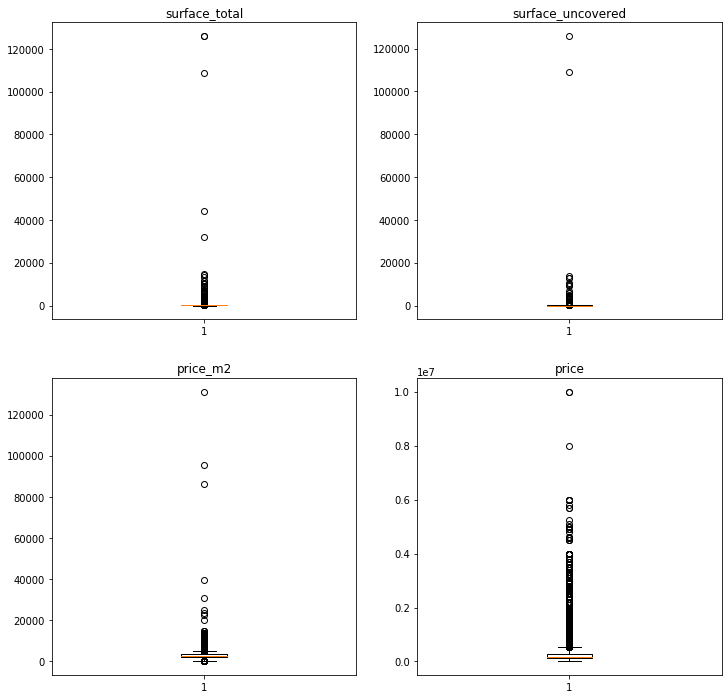

In [39]:
columns = ['surface_total','surface_uncovered','price_m2','price']
fig, axes = plt.subplots(2,2,figsize=(12,12))
index = 0
for i in range(2):
    for j in range(2):
        axes[i][j].boxplot(df[columns[index]])
        axes[i][j].set_title(columns[index])
        index += 1

Como vemos, hay en todas estas columnas valores ridículamente altos. Vamos a eliminarlos con la regla del rango intercuartílico

In [40]:
for column in columns:
    # Calculo cuartiles y rango intercuartílico
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Filtro
    df = df[(df[column] > q1-1.5*iqr) & (df[column] < q3+1.5*iqr)]

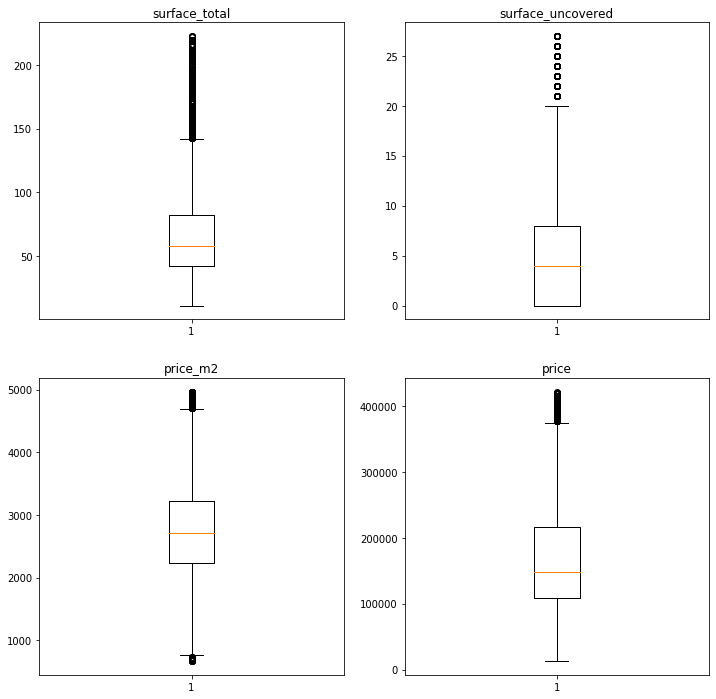

In [41]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
index = 0
for i in range(2):
    for j in range(2):
        axes[i][j].boxplot(df[columns[index]])
        axes[i][j].set_title(columns[index])
        index += 1

Las distribuciones presentan ahora una forma más homogénea; lo otro interesante es la asimetría y las "colas pesadas", sobre todo en el caso de 'surface_total' y en segundo lugar de 'price'. Por último investigamos outliers en el rubro 'rooms'.

In [42]:
print(f'Muestras con más de 6 habitaciones: ',df[df.rooms > 6].shape[0])
df[df.rooms > 6]

Muestras con más de 6 habitaciones:  63


,created_on,lat,lon,barrio_publicado,rooms,surface_total,surface_covered,price,title,description,...,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,surface_uncovered,price_m2
320,2019-08-02,-34.5682,-58.4874,Villa Urquiza,10.0000,200.0000,180.0000,270000.0000,Ph venta,"PH en una zona muy tranquila, a media cuadra d...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,20.0000,1421.0526
972,2019-04-07,-34.5746,-58.4833,Villa Urquiza,9.0000,187.0000,187.0000,315000.0000,PH 9 AMB Oficina Consultorios 187m2 Pacheco 2200,Corredor Responsable: Rebeca Stern - C.U.C.I.C...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1684.4920
1197,2019-08-06,-34.6156,-58.3864,Monserrat,7.0000,144.0000,119.0000,190000.0000,Departamento a reciclar totalmente en hermoso ...,Departamento a reciclar totalmente en hermoso ...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,25.0000,1444.8669
1220,2019-08-06,-34.6155,-58.3858,San Cristobal,7.0000,144.0000,119.0000,190000.0000,Departamento 144m² 7 ambientes con Plantas en ...,Departamento a reciclar totalmente en hermoso ...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,25.0000,1444.8669
1392,2019-07-20,-34.5679,-58.4878,Villa Urquiza,10.0000,200.0000,180.0000,270000.0000,Ph venta,"PH en una zona muy tranquila, a media cuadra d...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,20.0000,1421.0526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35600,2019-07-31,-34.6007,-58.3880,Tribunales,7.0000,149.0000,149.0000,300000.0000,Viamonte 1500 7 esq. - LA CUPULA- Edif. France...,Edificio antiguo de estilo Francés- La Cúpula-...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2013.4228
35635,2019-07-31,-34.6158,-58.3951,Balvanera,8.0000,151.0000,151.0000,190000.0000,VENTA PH AL FRENTE PRIMER PISO APTO PROFESIONA...,VENTA PH AL FRENTE PRIMER PISO APTO PROFESIONA...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1258.2781
35657,2019-07-31,-34.5978,-58.4250,Almagro,11.0000,155.0000,155.0000,260000.0000,VENTA de PH - Ideal para Oficina - Hostel - ...,Gran oportunidad!! Zona Ideal para Hostel a Re...,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1677.4194
35745,2019-07-31,-34.5966,-58.3798,Retiro,7.0000,170.0000,170.0000,350000.0000,6 Ambientes excelente Plaza San Martin,"Departamento en muy buen estado, muy amplio y ...",...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2058.8235


In [43]:
# Estas muestras las consideramos dudosas, las dropeamos de nuestro dataframe
rooms_drop_nd = df[df.rooms > 6].index
df = df.drop(rooms_drop_nd)

## Exportación de la información

Exportamos la información así procesada en formato .csv, para su utilización en posteriores notebooks.

In [62]:
# Reseteamos el indice
df.reset_index(inplace=True,drop=True)
# Exportamos
os.chdir('..')
df.to_csv('Data/Properati_data_clean.csv',sep=',',columns=df.columns,index=False)
os.chdir('Notebooks')